## 01 Import Libararies and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline


In [3]:
path= r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\A6-Advanced Analytics & Dashboard Design\20-01-24 NY Citi Bike project'


In [4]:
# import  datset
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citi_derived.csv'),index_col = False)

In [5]:
df.head()


,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,age,Trip Range,age_category
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,40.742388,-73.997262,993,Subscriber,1968,Female,16,45,long trip,Middle Age
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,40.728419,-73.987140,581,Subscriber,1983,Male,9,30,average trip,Adult
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,40.768254,-73.988639,361,Subscriber,1989,Male,6,24,average trip,Young Adult
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,40.756014,-73.967416,561,Subscriber,1988,Female,9,25,average trip,Young Adult
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,40.743943,-73.979661,2296,Non-Subscriber,1978,unknown,38,35,long trip,Adult


## 02 Data Cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'day_of_week', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'trip_duration_minutes', 'age', 'Trip Range', 'age_category'],
      dtype='object')

In [7]:
df.shape

(49977, 23)

In [8]:
# check for missing values
df.isnull().sum()

Unnamed: 0                 0
trip_id                    0
bike_id                    0
day_of_week                0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
trip_duration_minutes      0
age                        0
Trip Range                 0
age_category               0
dtype: int64

In [9]:
# Duplicates Check
dups = df.duplicated()
dups.shape 

(49977,)

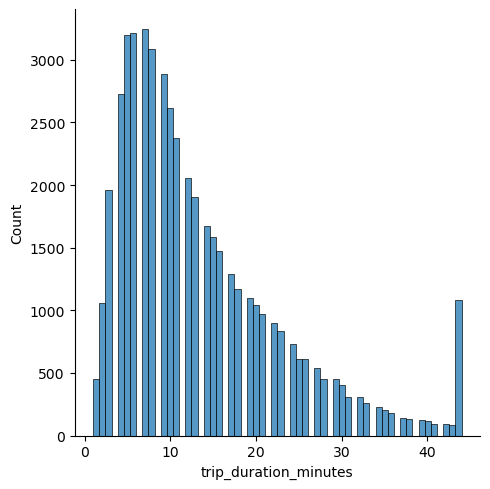

In [10]:
# Extreme values chek
sns.displot(df['trip_duration_minutes'], bins=60) # Shows extreme values
plt.show()

In [11]:
df['trip_duration_minutes'].mean() # check the mean

13.480821177741761

In [12]:
df['trip_duration_minutes'].median() # check the median

11.0

In [13]:
df['trip_duration_minutes'].max() # check the max

44

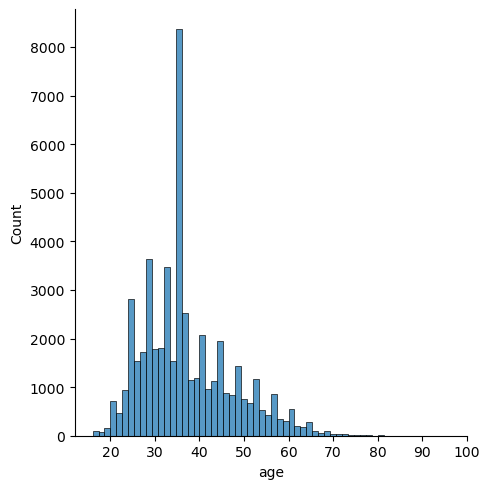

In [14]:
# Extreme values chek
sns.displot(df['age'], bins=60) # Shows extreme values
plt.show()

## 03 Data Prep for Regression Analysis


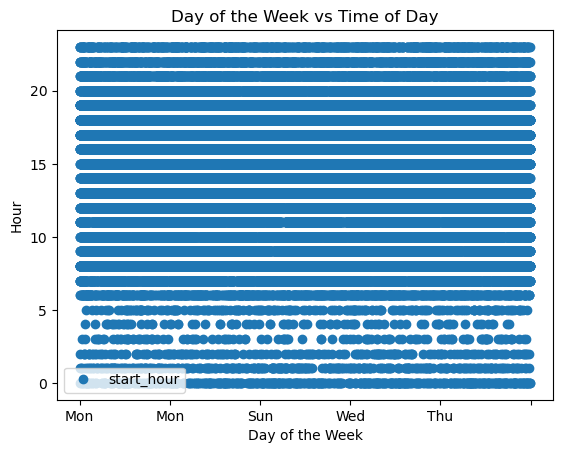

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'day_of_week', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Day of the Week vs Time of Day')  
plt.xlabel('Day of the Week')  
plt.ylabel('Hour')  

# Save the scatterplot as an image file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'sctterplot day of week vs start hour.png'))

# Display the plot
plt.show()

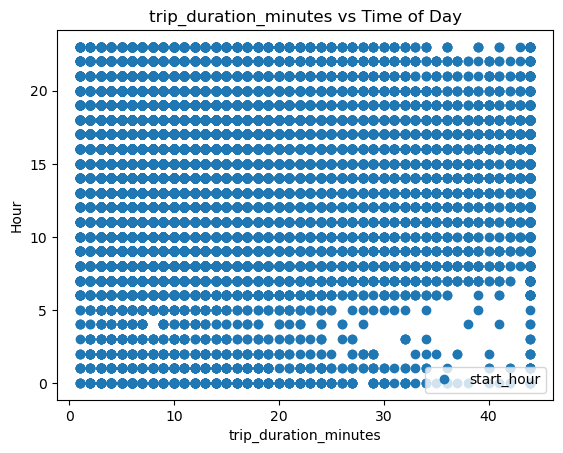

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'trip_duration_minutes', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip_duration_minutes vs Time of Day')  
plt.xlabel('trip_duration_minutes')  
plt.ylabel('Hour')  

# Save the scatterplot as an image file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'trip_duration_minutes vs Time of Day.png'))

# Display the plot
plt.show()

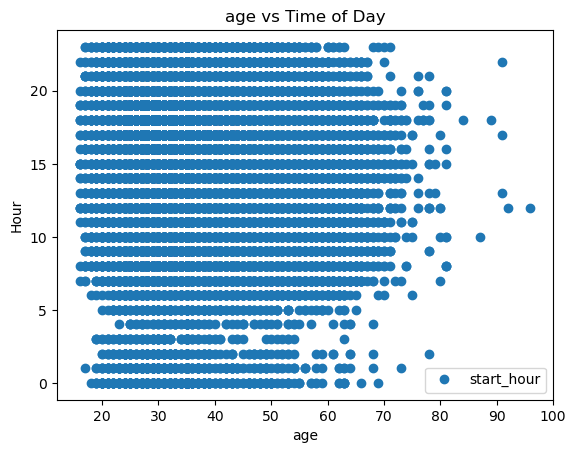

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='start_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('age vs Time of Day')  
plt.xlabel('age')  
plt.ylabel('Hour')  

# Save the scatterplot as an image file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'age vs Time of Dayy.png'))

# Display the plot
plt.show()

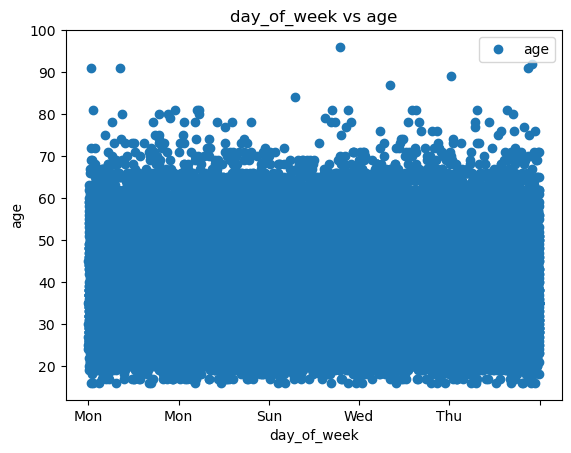

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'day_of_week', y='age',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('day_of_week vs age')  
plt.xlabel('day_of_week')  
plt.ylabel('age')  

# Save the scatterplot as an image file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'day_of_week vs age.png'))

# Display the plot
plt.show()

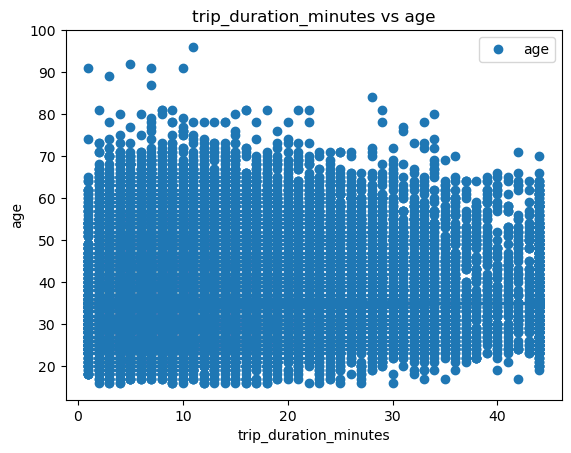

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'trip_duration_minutes', y='age',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip_duration_minutes vs age')  
plt.xlabel('trip_duration_minutes')  
plt.ylabel('age')  

# Save the scatterplot as an image file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'trip_duration_minutes vs age.png'))

# Display the plot
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['start_hour'].values.reshape(-1,1)
y = df['trip_duration_minutes'].values.reshape(-1,1)

In [21]:
X


array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]], dtype=int64)

In [22]:
y

array([[16],
       [ 9],
       [ 6],
       ...,
       [17],
       [44],
       [ 6]], dtype=int64)

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04 Regression Analysis

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

I predict that there will be longer trips in the morning and evening hours as people people use bikes to commute to work and home.



In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

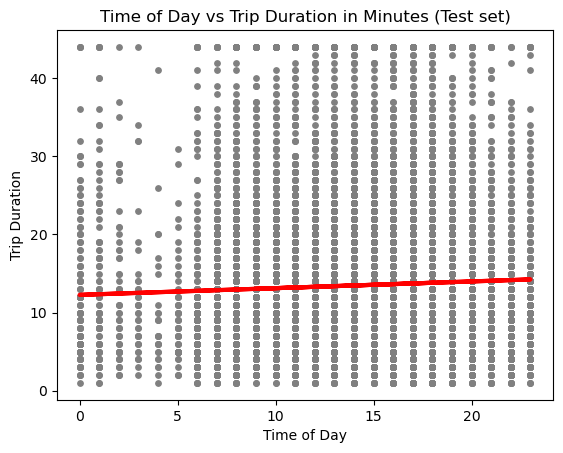

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Time of Day vs Trip Duration in Minutes (Test set)')
plot_test.xlabel('Time of Day')
plot_test.ylabel('Trip Duration')
plot_test.show()

There is a very small, positive slope to the regression line.



In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08611051]]
Mean squared error:  90.72443151526987
R2 score:  0.0011316841870323557


a slope of 0.086 suggests a very weak positive relationship between the independent variable and the dependent variable.
An MSE of 90.72 means that, on average, the predictions are quite far from the actual values. A lower MSE would be preferable for better model accuracy.
An R2 of 0.0011 is extremely low and suggests that the model explains only about 0.11% of the variance in the observed data.

In [30]:
y_predicted

array([[13.81701689],
       [13.21424335],
       [13.30035386],
       ...,
       [13.21424335],
       [13.81701689],
       [13.04202234]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,8,13.817017
1,5,13.214243
2,11,13.300354
3,11,13.214243
4,14,13.730906
5,8,13.730906
6,9,13.472575
7,26,13.472575
8,18,13.644796
9,6,13.128133


The predicted values do not refelct the actual fluctuation between the hours.



In [32]:
# Comparing how the regression fits the training set
y_predicted_train = regression.predict(X_train) # This is predicting X_train!


In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08611051]]
Mean squared error:  90.7594831494083
R2 score:  0.0019307683102784967


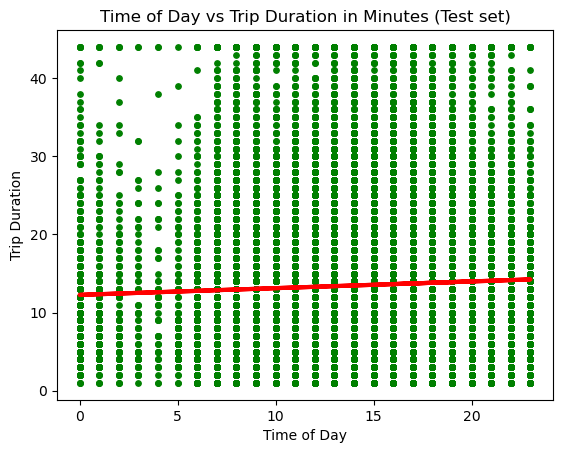

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Time of Day vs Trip Duration in Minutes (Test set)')
plot_test.xlabel('Time of Day')
plot_test.ylabel('Trip Duration')
plot_test.show()